# 作业8：噪声生成与检验

(1)用Numpy产生10000个均匀分布和高斯分布随机数，自行设定均匀分布的分布范围[a,b]，高斯分布的均值与方差

(2)用matplotlib 中的hist函数统计生成噪声的概率密度函数，同时用numpy内置的mean、var函数计算两类噪声的均值与方差，与理论值进行比较。

(3)利用实际计算得到的均值与方差，根据理论公式绘制噪声的pdf曲线，并与实际生成噪声的直方图进行对比

(4)利用生成的10000点高斯噪声，计算其自相关，绘制自相关波形。

(5)利用生成的10000点高斯噪声，计算其DFT变换，并画出DFT幅度波形。

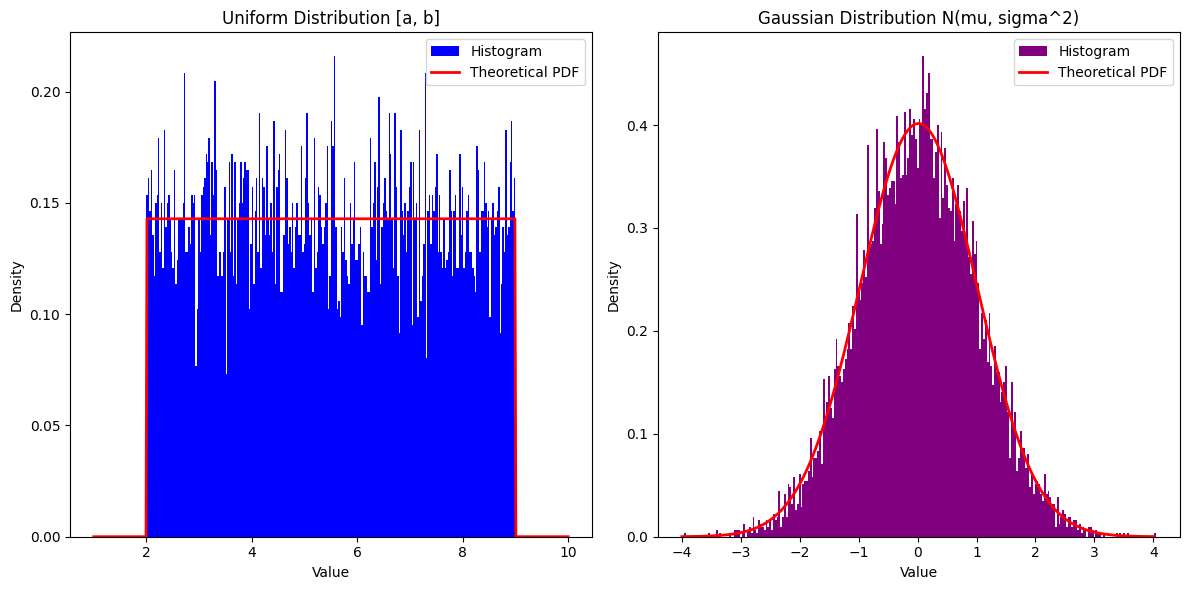

均匀分布理论均值: 5.5 实际均值: 5.477032192925639
均匀分布理论方差: 4.083333333333333 实际方差: 4.098942983719068

高斯分布理论均值: 0 实际均值: 0.01579845419510347
高斯分布理论方差: 1 实际方差: 0.9871103768661833


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 10000

#均匀分布参数
a, b = 2, 9
uniform_data = np.random.uniform(a, b, N)
uniform_mean = np.mean(uniform_data)
uniform_var = np.var(uniform_data)

#高斯分布参数
mu, sigma = 0, 1
gaussian_data = np.random.normal(mu, sigma, N)
gaussian_mean = np.mean(gaussian_data)
gaussian_var = np.var(gaussian_data)

# 根据实际均值和方差绘制分布 PDF
x_uniform = np.linspace(a - 1, b + 1, 500)
uniform_pdf = np.where((x_uniform >= a) & (x_uniform <= b), 1 / (b - a), 0)

x_gaussian = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
gaussian_pdf = norm.pdf(x_gaussian, gaussian_mean, np.sqrt(gaussian_var))

plt.figure(figsize=(12, 6))

#均匀分布直方图和PDF
plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=256, density=True, color='blue', label="Histogram")
plt.plot(x_uniform, uniform_pdf, 'r-', label="Theoretical PDF", linewidth=2)
plt.title("Uniform Distribution [a, b]")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

#高斯分布直方图和PDF
plt.subplot(1, 2, 2)
plt.hist(gaussian_data, bins=256, density=True, color='purple', label="Histogram")
plt.plot(x_gaussian, gaussian_pdf, 'r-', label="Theoretical PDF", linewidth=2)
plt.title("Gaussian Distribution N(mu, sigma^2)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

# 打印统计信息
print("均匀分布理论均值:", (a + b) / 2, "实际均值:", uniform_mean)
print("均匀分布理论方差:", ((b - a) ** 2) / 12, "实际方差:", uniform_var)
print()
print("高斯分布理论均值:", mu, "实际均值:", gaussian_mean)
print("高斯分布理论方差:", sigma**2, "实际方差:", gaussian_var)


自相关计算使用 np.correlate 函数，mode='full' 表示计算完全的自相关序列。自相关结果标准化后除以样本点数N，横轴 lags 表示滞后点。

DFT也是直接用np.fft.fft函数即可

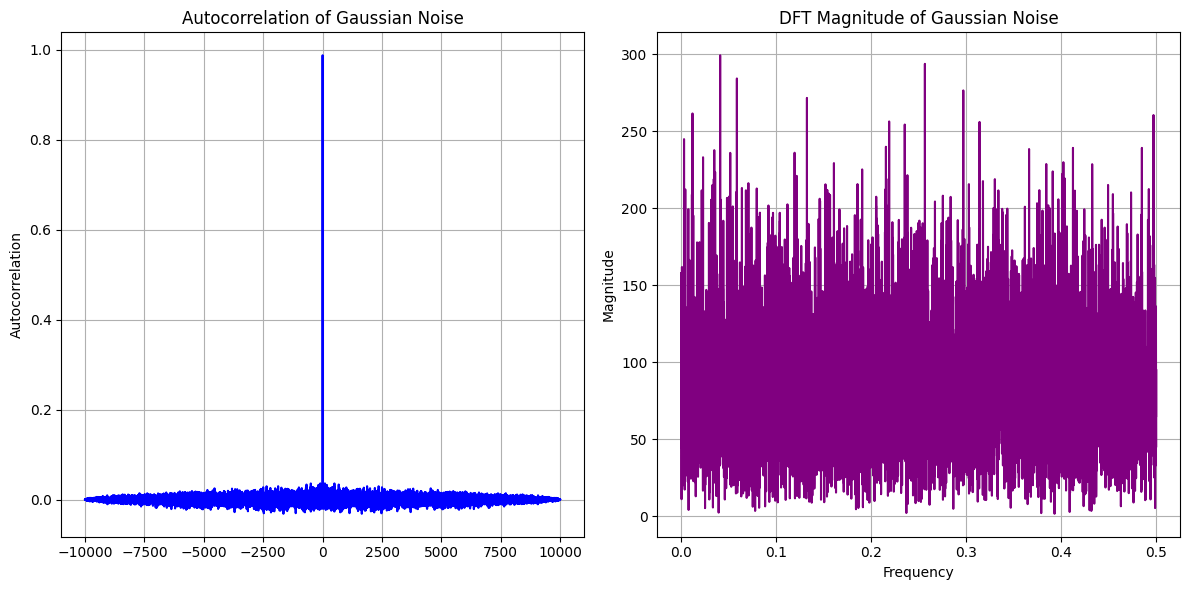

In [21]:
auto_corr = np.correlate(gaussian_data, gaussian_data, mode='full') / N
lags = np.arange(-N + 1, N)

#计算DFT变换
dft = np.fft.fft(gaussian_data)  # DFT 变换
freq = np.fft.fftfreq(N)         # 对应频率
dft_magnitude = np.abs(dft)      # DFT 幅值

#绘制波形
plt.figure(figsize=(12, 6))

#自相关波形
plt.subplot(1, 2, 1)
plt.plot(lags, auto_corr, color='blue')
plt.title("Autocorrelation of Gaussian Noise")
plt.ylabel("Autocorrelation")
plt.grid()

#DFT幅度波形
plt.subplot(1, 2, 2)
plt.plot(freq[:N // 2], dft_magnitude[:N // 2], color='purple')  # 取正频率部分
plt.title("DFT Magnitude of Gaussian Noise")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

自相关波形呈中心对称，滞后为0的值最大，表示与自身完全相关。

白噪声在DFT变换下频域表现为平坦的频谱，在区间内存在一些波动。